### Background and Context:

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

### Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:

The dataset has the following columns:

    tweet_id                                                           
    airline_sentiment                                               
    airline_sentiment_confidence                               
    negativereason                                                   
    negativereason_confidence                                    
    airline                                                                    
    airline_sentiment_gold                                              
    name     
    negativereason_gold 
    retweet_count
    text
    tweet_coord
    tweet_created
    tweet_location 
    user_timezone

### Steps & Evaluation Criteria
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understanding of data-columns: (5 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
3. Text pre-processing: Data preparation. (16 Marks)
NOTE:- Each text pre-processing steps should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Conversion to lowercase.
     f. Lemmatize or stemming.
     g. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     h. Print the first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization
     and performance of your model on this dataset. (8 Marks)
7.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

## Step 1 : Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [1]:
# Import pandas and numpy
import pandas as pd
import numpy as np

#presentation and plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# For Nautral Language Processing
import re, string, unicodedata # Regular expression for spl char removal, unicodedata for non-ascii/accented remova
import nltk                    # Natural language processing tool-kit  
nltk.download('punkt')         # Download punkt
nltk.download('stopwords')     # Download stopwords
nltk.download('wordnet')       # Download wordnet

!pip install contractions
import contractions            # import contraction for expanding acronyms
from bs4 import BeautifulSoup  # BeautifulSoup for html removal
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # stopwords and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer # NLTK's Stemmers and Lemmatizers
import spacy # For Lemmatize
nlp = spacy.load('en_core_web_sm') # Loads English tokenizer, parser, lemmatize


# warnings
import warnings
warnings.filterwarnings('ignore')

# For vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# model and metrics libraries for measuring performance
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.ensemble import RandomForestClassifier #RandomForest
from sklearn.ensemble import AdaBoostClassifier # Adaboost
from sklearn.ensemble import BaggingClassifier #Bagging
from sklearn.ensemble import GradientBoostingClassifier # Gradient
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score,roc_auc_score, precision_score, confusion_matrix, classification_report
from scipy import stats

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sridh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sridh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sridh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
airTweets=pd.read_csv('Tweets.csv')

In [3]:
airTweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
airTweets.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [5]:
# Shape of the data set:
print ("Shape of the given data set : ", airTweets.shape) # Shape of the dataset

Shape of the given data set :  (14640, 15)


In [6]:
# List of columns
airTweets.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
# Print the information of the given dataset 

print("Dataset Information \n")
print("***************************************")
airTweets.info()

Dataset Information 

***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12

In [8]:
# Check for NULL values

print("NULL CHECK \n")
print("***************************************")
airTweets.isnull().sum().to_frame()
#print("\n\nNull Values anywhere : ", airTweets.isnull().values.any())

NULL CHECK 

***************************************


,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [9]:
# Check for Duplicates in the dataset
print("Are there any duplicates --> {0}".format(airTweets[airTweets.duplicated()].count().values.any()))

Are there any duplicates --> True


In [10]:
airTweets[airTweets.duplicated()==True].count() 

tweet_id                        36
airline_sentiment               36
airline_sentiment_confidence    36
negativereason                  19
negativereason_confidence       19
airline                         36
airline_sentiment_gold           0
name                            36
negativereason_gold              0
retweet_count                   36
text                            36
tweet_coord                      4
tweet_created                   36
tweet_location                  26
user_timezone                   30
dtype: int64

In [11]:
# Display the duplicate rows

airTweets[airTweets.duplicated()==True]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


In [12]:
# Data types of the given dataset
airTweets.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [13]:
# Describe of the Data including all cols. This will give the uniqueness of categorical / non-numerical cols.

airTweets.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [14]:
# Check for airline sentiment counts

airTweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [15]:
# Check for negative reason counts

airTweets['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [16]:
# Check for # of airlines count

print('Unique airlines : {}'.format(airTweets['airline'].nunique()))

airlines = []
airlines = airTweets['airline'].unique()
print('List of Airlines : ', airlines)

Unique airlines : 6
List of Airlines :  ['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


In [17]:
airTweets['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [18]:
airTweets['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Cancelled Flight                             3
Can't Tell                                   3
Cancelled Flight\nCustomer Service Issue     2
Lost Luggage\nDamaged Luggage                1
Late Flight\nFlight Attendant Complaints     1
Customer Service Issue\nCan't Tell           1
Flight Attendant Complaints                  1
Late Flight\nCancelled Flight                1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Customer Service Issue\nLost Luggage         1
Name: negativereason_gold, dtype: int64

## Initial Inference of the Dataset
- Shape of the dataset       : 14640 rows and 15 columns
- airline_sentiment is the target column to be reviewed for sentiment of the text provided in 'Text' in the tweet
- 11 features are object and 4 numeric
- Out of the 11 features, following are categorical with mentioned values that is of use for Sentiment Analysis. 
    - airline_sentiment: negative, neutral, positive
    - negativereason: Customer Service Issue, Late Flight, Can't Tell, Cancelled Flight, Lost Luggage, Bad Flight, Flight Booking Problems, Flight Attendant Complaints, longlines, Damaged Luggage. With Customer Service Issue being the top negative reason.
    - airline : United, US Airways, American, Southwest, Delta, Virgin America
    - airline_sentiment_gold : negative, positive, netural
    - negativereason_gold: ustomer Service Issue, Late Flight, Can't Tell, Cancelled Flight, Cancelled Flight\nCustomer Service Issue, Late Flight\nCancelled Flight, Late Flight\nLost Luggage, Flight Attendant Complaints, Lost Luggage\nDamaged Luggage, Customer Service Issue\nLost Luggage, Customer Service Issue\nCan't Tell, Bad Flight , Late Flight\nFlight Attendant Complaints
- Uniqueness of the dataset  : We see there are 36 rows that are duplicated. We can dedup them
- Null values of the dataset : There are NULL values, but for the given the problem statement for sentiment analysis with "Text" and "airline_Sentiment", these 2 columns do not have NULL.
- First glance at the airline sentiment count we have:
    - 9178 Negative
    - 3099 Nuetral
    - 2363 Positive
- The above shows that the target classification seem to be imbalanced to Negative sentiment but that is possible as these are reviews. Don't think a SMOTE is required here. But, will keep the option open.

##### Important point, the target - airline_sentiment is a categorical column with ordinal values. We will replace construct (label encode) with it once the EDA is done and before modelling. #####

### Next Step I will dedup and perform EDA


In [19]:
# De-duping the given dataset

airTweets.drop_duplicates(inplace=True)
airTweets.shape

(14604, 15)

#### We can drop the following columns from the deduped dataset for EDA purpose with key columns for reviews.
- tweet_id
- name
- retweet_count
- tweet_coord
- tweet_created
- tweet_location
- user_timezone

In [20]:
airTweets.drop(['tweet_id', 'name', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [21]:
airTweets.shape

(14604, 8)

In [22]:
airTweets.dtypes

airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
negativereason_gold              object
text                             object
dtype: object

#### Countplot graph for Airline with corresponding overall airline sentiment recorded in dataset

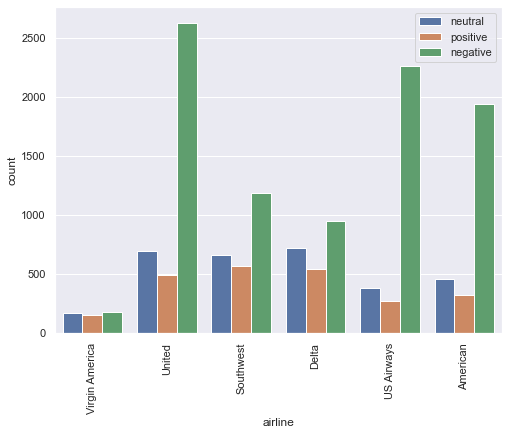

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(airTweets['airline'], hue=airTweets['airline_sentiment'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Countplot graph for Airline with corresponding categories in negativereason column recorded in dataset

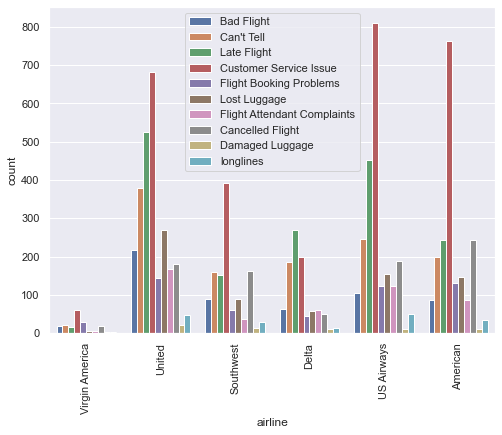

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(airTweets['airline'], hue=airTweets['negativereason'])
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Countplot graph for negative reason recorded in dataset

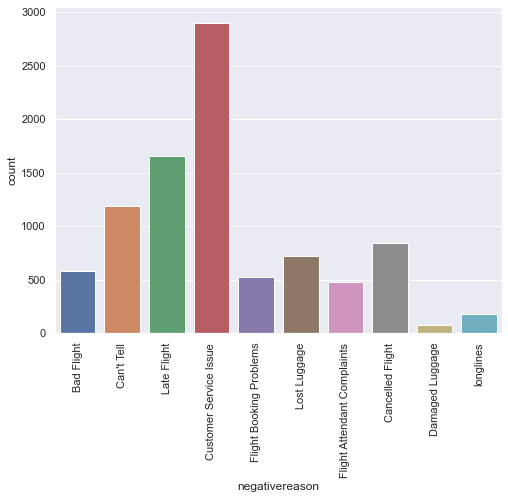

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(airTweets['negativereason'])
plt.xticks(rotation=90)
plt.show()

#### The below snippet gives the relative percentage of each of the catgory of the airline_sentiment within  airline

In [26]:
pd.crosstab(airTweets['airline_sentiment'],airTweets['airline'], normalize='index')*100

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,21.192270,10.426903,12.949012,24.707938,28.747680,1.976198
neutral,14.720155,23.390489,21.481721,12.326108,22.549337,5.532190
positive,13.891249,23.109601,24.214104,11.427358,20.900595,6.457094


In [27]:
airTweets.groupby('airline')['airline_sentiment'].count()

airline
American          2723
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

In [28]:
airTweets.groupby(['airline'])['airline_sentiment'].value_counts()

airline         airline_sentiment
American        negative             1941
                neutral               455
                positive              327
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

#### The below snippet gives the percentage of negative sentiment to total sentiments recorded for that airline

In [29]:
j=0
airlines =['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America']
x=range(0,16,3)
for i in x:
    print(airlines[j])
    print(round((airTweets.groupby(['airline'])['airline_sentiment'].value_counts()[i])/(airTweets.groupby('airline')['airline_sentiment'].count()[j])*100,2))
    j=j+1
    


American
71.28
Delta
42.98
Southwest
49.01
US Airways
77.69
United
68.89
Virgin America
35.91


## Inference of the Twitter Dataset from EDA

- MOST REVIEWS : United has the most reviews given (=3822) followed by US Airways (=2913) and American (=2723)
- MOST # of NEGATIVE REVIEWS : United has the most negative reviews given (=2633) followed by US Airways (=2263) and American (=1941)
- MAX NEGATIVE REVIEWS %age of all reviews for an airline: US AIRWAYS has 77.69% of its total reviews being Negative followed by American (=71.28) and United (=68.89)
- LEAST NEGATIVE REVIEWS %age is for Virgin America (=35.91)
- FOR THE NEGATIVE REVIEW REASONS
    - Customer Service Issue tops the main reason for negative reviews followed by Late Flight
    - Amongst the top 3 reviewed airlines - United, US Airways, and American, following is the top 2 negative reasons for each airline
        - United : Customer Service Issue followed by Late Flight
        - US Airways : Customer Service Issue followed by Late Flight
        - American : Customer Service Issue followed by Late Flight & Cancelled Flight
   

## Step 2 :Understanding of data-columns: (5 Marks) 
- a. Drop all other columns except “text” and “airline_sentiment”. 
- b. Check the shape of the data. 
- c. Print the first 5 rows of data.

In [30]:
airTweets.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'negativereason_gold', 'text'],
      dtype='object')

In [31]:
airTweets.shape

(14604, 8)

In [32]:
# Drop the unnecessary columns. Please note, during EDA I had drop the rest of unecessary cols already (namely :
#   tweet_id, name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone)
    
colList=['airline_sentiment_confidence','negativereason','negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'negativereason_gold' ]

airTweets.drop(colList, axis=1, inplace=True)

airTweets

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


In [33]:
# Shape of the dataset after dropping cols.

airTweets.shape

(14604, 2)

In [34]:
# Top 5 rows
airTweets.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [35]:
# Display TOP 5 ROWS full dataframe information with truncation of text field.
pd.set_option('display.max_colwidth', None)

airTweets.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [36]:
# Display additional rows to see different text

airTweets.head(11)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


## Step 3. Text pre-processing: Data preparation. (16 Marks)

NOTE:- Each text pre-processing steps should be mentioned in the notebook separately.
- a. Html tag removal.
- b. Tokenization.
- c. Remove the numbers.
- d. Removal of Special Characters and Punctuations.
- e. Conversion to lowercase.
- f. Lemmatize or stemming.
- g. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.
- h. Print the first 5 rows of data after pre-processing.

### HTML Tag Removal

In [37]:
# Use BeautifulSoap's get_text function to remove html tags and return a clean text

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    clean_text_html = soup.get_text()
    return clean_text_html

airTweets['text'] = airTweets['text'].apply(lambda x: remove_html_tags(x)) #apply the removal html function for every value of the text series
airTweets.head(11)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me."


### Contractions Replacing

In [38]:
# Use contractions package's fix function. It's, didn't etc to be expanded

def replace_contractions(text):
    clean_text_cont = contractions.fix(text)
    return clean_text_cont

airTweets['text'] = airTweets['text'].apply(lambda x: replace_contractions(x))#apply the replace contractions function for every value of the text series
airTweets.head(11)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $30 a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP"
8,positive,"@virginamerica Well, I did not…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me."


### Remove Numbers

In [39]:
# Use regular expression function sub to replace the text with null character matching the pattern
pattern='\d+' # d denotes digit and + denotes any instances of digits
def remove_numbers(text):
  clean_text_num = re.sub(pattern, '', text)
  return clean_text_num

airTweets['text'] = airTweets['text'].apply(lambda x: remove_numbers(x))#apply the removenumbers function for every value of the text series
airTweets.head(11)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it
5,negative,@VirginAmerica seriously would pay $ a flight for seats that did not have this playing.\nit is really the only bad thing about flying VA
6,positive,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” will not go away :)"
7,neutral,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpGgrEZP"
8,positive,"@virginamerica Well, I did not…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an hour early. you are too good to me."


### Remove Special Characters

In [40]:
# Use regular expression function sub to replace the text with null character matching the pattern
pattern='[^a-zA-Z0-9\s]'    # ^ denotes not of. so this means to match anything that is not of lower/upper case Eng alphabet numbers and space                 
def remove_spl_chars(text):                   
       clean_text_spl = re.sub(pattern, '', text) # remove the spl chars
       return clean_text_spl

airTweets['text'] = airTweets['text'].apply(lambda x: remove_spl_chars(x))#apply the removal spl char function for every value of the text series
airTweets.head(11)

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials to the experience tacky
2,neutral,VirginAmerica I did not today Must mean I need to take another trip
3,negative,VirginAmerica it is really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and it is a really big bad thing about it
5,negative,VirginAmerica seriously would pay a flight for seats that did not have this playing\nit is really the only bad thing about flying VA
6,positive,VirginAmerica yes nearly every time I fly VX this ear worm will not go away
7,neutral,VirginAmerica Really missed a prime opportunity for Men Without Hats parody there httpstcomWpGgrEZP
8,positive,virginamerica Well I did notbut NOW I DO D
9,positive,VirginAmerica it was amazing and arrived an hour early you are too good to me


### Tokenize

In [41]:
# Tokenize the words of whole dataframe.

for i, row in airTweets.iterrows():
    text = airTweets.at[i, 'text']
    words = word_tokenize(text)
    airTweets.at[i,'text'] = words
    
airTweets.head(11)

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,negative,"[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]"
6,positive,"[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]"
7,neutral,"[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, httpstcomWpGgrEZP]"
8,positive,"[virginamerica, Well, I, did, notbut, NOW, I, DO, D]"
9,positive,"[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]"


In [42]:
airTweets.head(11)

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,negative,"[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]"
6,positive,"[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]"
7,neutral,"[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, httpstcomWpGgrEZP]"
8,positive,"[virginamerica, Well, I, did, notbut, NOW, I, DO, D]"
9,positive,"[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]"


### Set Stop Words

In [43]:
stoplist = set(stopwords.words("english"))
stoplist

# I have added words that would be needed as part of sentiment review especially the negate words.

dontrmvlist = ['again', 'against',"aren't",'could', 'can', "couldn't","didn't", "doesn't", 'doesn','didn', 'couldn', 'aren','did',
                "don't",'does','had', 'hadn', "hadn't",'has','hasn', "hasn't",'have',"haven't", 'is',  'isn', "isn't", 'mightn', 'might', 
                "mightn't",'must', 'mustn', "mustn't",'need', 'needn', "needn't", 'no', 'not','nor', 'shan', "shan't", 'shouldn',
                "shouldn't",'wasn',"wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

finalStopList = list(set(stoplist) - set(dontrmvlist)) 

finalStopList

['if',
 'you',
 'more',
 'my',
 'm',
 'she',
 'do',
 'are',
 'for',
 'where',
 'too',
 "that'll",
 'above',
 'about',
 'i',
 'under',
 'the',
 'only',
 'themselves',
 'why',
 'between',
 'once',
 'being',
 'these',
 're',
 'am',
 've',
 'because',
 'will',
 'this',
 'what',
 'should',
 'both',
 'we',
 'by',
 'all',
 'its',
 'a',
 'but',
 'from',
 'was',
 'and',
 'how',
 'each',
 'ourselves',
 'hers',
 'their',
 'been',
 'me',
 'to',
 'such',
 'of',
 'that',
 'most',
 "you'd",
 'be',
 'few',
 'haven',
 'himself',
 'down',
 'in',
 'having',
 'him',
 'ain',
 'his',
 'doing',
 'through',
 'so',
 'than',
 'after',
 'whom',
 'o',
 'or',
 'further',
 'them',
 'y',
 'out',
 'who',
 'which',
 'ma',
 'off',
 'your',
 't',
 'as',
 'just',
 'very',
 'ours',
 'itself',
 'before',
 'there',
 'during',
 'then',
 'those',
 'yours',
 "should've",
 'now',
 'below',
 'yourself',
 'some',
 'our',
 's',
 'theirs',
 "you're",
 'were',
 'herself',
 'other',
 'into',
 'up',
 'any',
 'at',
 'yourselves',
 'sam

### Remove Punctuations

In [44]:
pattern='[^\w\s]'                         # do not remove any character/number/_/space characters
def remove_punctuation(words):
    words_nopunc_list = []
    for word in words:
        #print(word)
        word_nopunc = re.sub(pattern, '', word)
        if word_nopunc != '':
            words_nopunc_list.append(word_nopunc)
    return words_nopunc_list

#remove_punctuation(['SRIDHAR', 'it', 'is', 'not'])

### Remove Non-ASCII

In [45]:
def remove_non_ascii(words): # remove non-ASCII chars from list of word tokens. accented chars.
    words_nonascii_list = []
    #print(words)
    for word in words:
       # print(word)
        word_nonascii = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        if word_nonascii != '':
            words_nonascii_list.append(word_nonascii)
    return words_nonascii_list

#remove_non_ascii(['SRIDHAR', 'it', 'is', 'not'])

### To_Lowercase

In [46]:
def to_lowercase(words): # convert chars to lower case from the list of word tokens
    words_lower_list = []
    for word in words:
        word_lower = word.lower()
        if word_lower != '':
            words_lower_list.append(word_lower)
    return words_lower_list

#to_lowercase(['XYZ', 'it', 'is', 'not'])

### Remove Stopwords

In [47]:
def remove_stopwords(words): # removes stopwords from the list of word tokens passed
    words_nostop_list = []
    for word in words:
        #print(word)
        if word not in finalStopList:
            words_nostop_list.append(word)
            #print(words_nostop_list)
    return words_nostop_list

#remove_stopwords(['SRIDHAR', 'it', 'is', 'not'])

### Lemmatization - Will use Lemmatization instead of Stemming to get proper root word

In [48]:
lemma = WordNetLemmatizer()

def lemmatize_words(words):
    words_lemmatized = []
    for word in words:
        #print(word)
        words_lemma_verb = lemma.lemmatize(word, pos='v') # lemmatizes verb part of speech
        if words_lemma_verb != '':
            words_lemmatized.append(words_lemma_verb)
    return words_lemmatized   

#lemmatize_words(['SRIDHAR', 'is', 'not', 'playing'])

### Join the words in the list and convert back to a string and replace in the dataframe

In [49]:
def join_words(words):
    return ' '.join(words)

### Modularize all individual pre-processor functions on the work tokens to a group function (normalize)

In [50]:
def normalize_init_preprocessing(words):
    words = remove_punctuation(words)         # remove punctuations
    words = remove_non_ascii(words)           # remove non-ascii characters
    words = to_lowercase(words)               # lower case the text
    words = remove_stopwords(words)           # remove stop words
    words = lemmatize_words(words)            # use lemmatization
    return join_words(words)                  # joins the words back as a string and replace the text in dataframe


In [51]:
# BEFORE normalizing the top 11 rows in the airTweets dataframe

airTweets.head(11)

,airline_sentiment,text
0,neutral,"[VirginAmerica, What, dhepburn, said]"
1,positive,"[VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]"
2,neutral,"[VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]"
3,negative,"[VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"
5,negative,"[VirginAmerica, seriously, would, pay, a, flight, for, seats, that, did, not, have, this, playing, it, is, really, the, only, bad, thing, about, flying, VA]"
6,positive,"[VirginAmerica, yes, nearly, every, time, I, fly, VX, this, ear, worm, will, not, go, away]"
7,neutral,"[VirginAmerica, Really, missed, a, prime, opportunity, for, Men, Without, Hats, parody, there, httpstcomWpGgrEZP]"
8,positive,"[virginamerica, Well, I, did, notbut, NOW, I, DO, D]"
9,positive,"[VirginAmerica, it, was, amazing, and, arrived, an, hour, early, you, are, too, good, to, me]"


In [52]:
for i, row in airTweets.iterrows():
    words = airTweets.at[i, 'text']
    words = normalize_init_preprocessing(words)
    airTweets.at[i,'text'] = words
 
airTweets.head(11)

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus have add commercials experience tacky
2,neutral,virginamerica do not today must mean need take another trip
3,negative,virginamerica be really aggressive blast obnoxious entertainment guests face have little recourse
4,negative,virginamerica be really big bad thing
5,negative,virginamerica seriously would pay flight seat do not have play be really bad thing fly va
6,positive,virginamerica yes nearly every time fly vx ear worm not go away
7,neutral,virginamerica really miss prime opportunity men without hat parody httpstcomwpggrezp
8,positive,virginamerica well do notbut
9,positive,virginamerica amaze arrive hour early good


### Top 5 Rows of data

In [53]:
airTweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus have add commercials experience tacky
2,neutral,virginamerica do not today must mean need take another trip
3,negative,virginamerica be really aggressive blast obnoxious entertainment guests face have little recourse
4,negative,virginamerica be really big bad thing


## Step 4. Vectorization: (10 Marks) 
- a. Use CountVectorizer. 
- b. Use TfidfVectorizer.


### 4a. Using CountVectorizer

In [54]:
# Vectorization - Intent is to assign numbers to the text we just preprocessed
print ("Creating the bag of words...\n")
count_vectorizer = CountVectorizer(max_features=5000)         # Keep only 5000 features as number of features will increase the processing time.
word_features = count_vectorizer.fit_transform(airTweets['text'])

word_features = word_features.toarray()                        # Convert the data features to array.

Creating the bag of words...



In [57]:
# Vocabulary with recurrence of the count vectorizer
cv_vocab_count=count_vectorizer.vocabulary_
cv_vocab_count

{'virginamerica': 4771,
 'say': 3898,
 'plus': 3304,
 'have': 2023,
 'add': 59,
 'commercials': 931,
 'experience': 1573,
 'do': 1342,
 'not': 2969,
 'today': 4511,
 'must': 2861,
 'mean': 2707,
 'need': 2893,
 'take': 4387,
 'another': 202,
 'trip': 4577,
 'be': 404,
 'really': 3530,
 'aggressive': 94,
 'blast': 486,
 'obnoxious': 3009,
 'entertainment': 1486,
 'guests': 1974,
 'face': 1597,
 'little': 2559,
 'recourse': 3555,
 'big': 459,
 'bad': 359,
 'thing': 4458,
 'seriously': 3968,
 'would': 4931,
 'pay': 3199,
 'flight': 1708,
 'seat': 3930,
 'play': 3289,
 'fly': 1737,
 'va': 4733,
 'yes': 4967,
 'nearly': 2891,
 'every': 1529,
 'time': 4493,
 'vx': 4790,
 'ear': 1405,
 'go': 1912,
 'away': 341,
 'miss': 2793,
 'prime': 3390,
 'opportunity': 3072,
 'men': 2733,
 'without': 4892,
 'hat': 2019,
 'well': 4848,
 'amaze': 161,
 'arrive': 262,
 'hour': 2125,
 'early': 1408,
 'good': 1922,
 'know': 2455,
 'suicide': 4317,
 'second': 3936,
 'lead': 2507,
 'death': 1173,
 'among': 174,

In [58]:
#print the countvectorizeer vocabulary
cv_vocab=count_vectorizer.get_feature_names()
print('*********************************************')
print(cv_vocab)

*********************************************
['aa', 'aaba', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'aas', 'ab', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', '

In [59]:
# Shape of the word_features array after count vectorization
word_features.shape

(14604, 5000)

In [60]:
# Print the word_features
word_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(word_features, axis=0) #sum the no. of instances of each word in entire dataset.

# For each, print the vocabulary word and the number of times appears in the dataset
for tag, count in zip(cv_vocab, dist):
    print (count, tag)

274 aa
2 aaba
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 aas
2 ab
3 abandon
7 abc
2 abcnetwork
2 abilities
5 ability
120 able
4 aboard
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
7 abt
3 abuse
6 abysmal
10 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
80 account
6 accountability
2 accrue
10 acct
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
126 add
4 addition
17 additional
53 address
3 addtl
2 adjacent
4 admiral
13 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
23 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
2 afterall
30 afternoon
383 again
6 against
15 age
6 agency
258 agent
155 agents
3 aggravate
3 aggressive
2 agn

### 4b. Using tf-idf Vectorizer

In [62]:
# Vectorization - Intent is to assign numbers to the text we just preprocessed

tfidf_vectorizer = TfidfVectorizer(max_features=5000)    #Keep only 5000 features as number of features will increase the processing time.
tfif_features = tfidf_vectorizer.fit_transform(airTweets['text'])

tfif_features = tfif_features.toarray()

In [63]:
# Vocabulary of the tfidf vectorizer with count
tfidf_vocab_count=tfidf_vectorizer.vocabulary_
tfidf_vocab_count

{'virginamerica': 4771,
 'say': 3898,
 'plus': 3304,
 'have': 2023,
 'add': 59,
 'commercials': 931,
 'experience': 1573,
 'do': 1342,
 'not': 2969,
 'today': 4511,
 'must': 2861,
 'mean': 2707,
 'need': 2893,
 'take': 4387,
 'another': 202,
 'trip': 4577,
 'be': 404,
 'really': 3530,
 'aggressive': 94,
 'blast': 486,
 'obnoxious': 3009,
 'entertainment': 1486,
 'guests': 1974,
 'face': 1597,
 'little': 2559,
 'recourse': 3555,
 'big': 459,
 'bad': 359,
 'thing': 4458,
 'seriously': 3968,
 'would': 4931,
 'pay': 3199,
 'flight': 1708,
 'seat': 3930,
 'play': 3289,
 'fly': 1737,
 'va': 4733,
 'yes': 4967,
 'nearly': 2891,
 'every': 1529,
 'time': 4493,
 'vx': 4790,
 'ear': 1405,
 'go': 1912,
 'away': 341,
 'miss': 2793,
 'prime': 3390,
 'opportunity': 3072,
 'men': 2733,
 'without': 4892,
 'hat': 2019,
 'well': 4848,
 'amaze': 161,
 'arrive': 262,
 'hour': 2125,
 'early': 1408,
 'good': 1922,
 'know': 2455,
 'suicide': 4317,
 'second': 3936,
 'lead': 2507,
 'death': 1173,
 'among': 174,

In [64]:
# Print the tfidf vocabulary
tfidf_vocab=tfidf_vectorizer.get_feature_names()
print(tfidf_vocab)

['aa', 'aaba', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'aas', 'ab', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'afterall', 'afternoon', 'again', 'against', 'age', 'agency

In [65]:
# Shape of the word_features array after tfidf vectorization
tfif_features.shape

(14604, 5000)

In [66]:
# Print the tfidf_features

tfif_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(tfif_features, axis=0)

# For each, print the vocabulary word and the number of times appears in the dataset
for tag, count in zip(tfidf_vocab, dist):
    print (count, tag)

71.96857770467705 aa
0.9983970662803077 aaba
0.7230239966527373 aadv
3.9488694034756002 aadvantage
0.8840025318210665 aafail
0.9582229114663243 aal
0.7230239966527373 aano
1.1906390374866989 aarp
1.3262863361456934 aas
0.8180772421145649 ab
1.331976726157026 abandon
3.1142993576381297 abc
0.9486681871139327 abcnetwork
0.9247759621083895 abilities
2.1580259944694298 ability
39.149216769232524 able
1.8011032250966061 aboard
3.496234030249961 abq
1.0917863590020866 abroad
9.059160727252552 absolute
13.187054896900504 absolutely
5.7738451178385555 absurd
2.628999606901828 abt
1.2903441511680351 abuse
2.4903868600080714 abysmal
3.906558454936997 ac
11.846742991293553 accept
9.143005285341435 acceptable
13.58986011266265 access
2.35406046401468 accident
1.5419128365166388 accidentally
9.803188326692693 accommodate
3.6053521887220104 accommodations
2.0127046070601073 accomplish
4.429635139232654 accord
2.024113962929047 accordingly
25.43252947976015 account
2.679011742239719 accountability
0.

In [68]:
#Check print top 5 rows
airTweets.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus have add commercials experience tacky
2,neutral,virginamerica do not today must mean need take another trip
3,negative,virginamerica be really aggressive blast obnoxious entertainment guests face have little recourse
4,negative,virginamerica be really big bad thing


In [69]:
airTweets['airline_sentiment'].value_counts()

negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64

## Step 5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)


In [70]:
# First lets label encode the airline_sentiment
replaceStruct = {
                "airline_sentiment": {"negative": 0, "neutral": 1 ,"positive": 2}
                }
airTweets=airTweets.replace(replaceStruct)

In [71]:
airTweets['airline_sentiment'].value_counts()

0    9159
1    3091
2    2354
Name: airline_sentiment, dtype: int64

#### From above we see that we replaced negative with least(=0), neutral with 1, and positive with 2. And also checked the value_counts, no changes.

### Step 5a. RandomForestClassifier for count_vectorizer method

In [72]:
# features
word_features.shape

(14604, 5000)

In [73]:
X= word_features # Features from countvecotrizer
type(X)
X.shape

(14604, 5000)

In [74]:
y=airTweets['airline_sentiment'] # Response or Target varriable
y.shape

(14604,)

In [75]:
# Split given data into training and testing set with test size of 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6579)

In [76]:
# print shapes of train and test data

print('Training data features shape : ',X_train.shape)
print('Training data target shape : ',y_train.shape)
print('Testing data features shape : ',X_test.shape)
print('Testing data target shape : ',y_test.shape)

Training data features shape :  (10222, 5000)
Training data target shape :  (10222,)
Testing data features shape :  (4382, 5000)
Testing data target shape :  (4382,)


In [77]:
# split test into further validation and holdout


X_valid, X_hold, y_valid, y_hold = train_test_split(X_test, y_test, test_size=0.5, random_state=12478)

In [78]:
# print shapes of valid and final test data

print('Validation data features shape : ',X_valid.shape)
print('Validation data target shape : ',y_valid.shape)
print('Holding data features shape : ',X_hold.shape)
print('Holding data target shape : ',y_hold.shape)

Validation data features shape :  (2191, 5000)
Validation data target shape :  (2191,)
Holding data features shape :  (2191, 5000)
Holding data target shape :  (2191,)


## Use RandomForestClassifier for Evaluation for CountVecotrizer

In [80]:
# Using RandomForestClassifer as first model evaluation for CountVectorization technique

cv_forest = RandomForestClassifier(n_estimators=100, n_jobs=4) # 100 estimators (by default is gini and full depth)
cv_forest.fit(X_train, y_train) # fit the model with training data

RandomForestClassifier(n_jobs=4)

Training Accuracy :  0.9954020739581295
Validation Accuracy:  0.758557736193519
Training Accuracy by cross validation:  0.7736258806740468
Draw Confusion Matrix with Validation Data


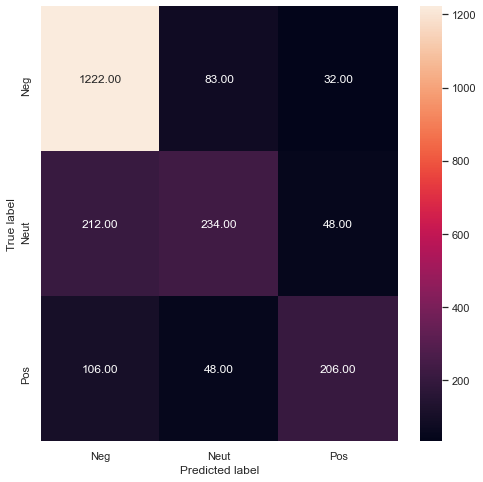

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1337
           1       0.64      0.47      0.54       494
           2       0.72      0.57      0.64       360

    accuracy                           0.76      2191
   macro avg       0.72      0.65      0.68      2191
weighted avg       0.75      0.76      0.75      2191

Testing(Holding) data Accuracy:  0.7681424007302602
Draw Confusion Matrix with Holdout Data


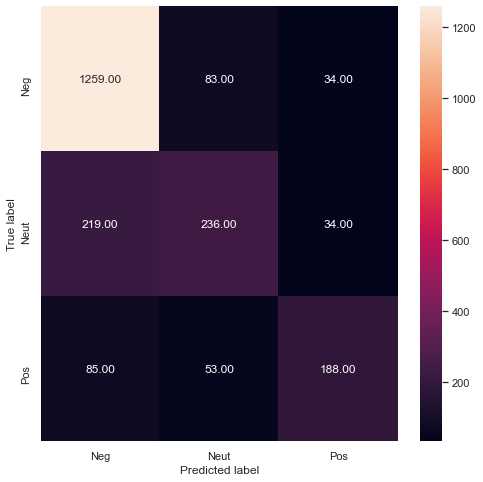

Classification Report for Holdout Data
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1376
           1       0.63      0.48      0.55       489
           2       0.73      0.58      0.65       326

    accuracy                           0.77      2191
   macro avg       0.72      0.66      0.68      2191
weighted avg       0.76      0.77      0.76      2191



In [81]:
# Training and Validation Accuracy

print('Training Accuracy : ', cv_forest.score(X_train, y_train))
print('Validation Accuracy: ', cv_forest.score(X_valid, y_valid))

# cross validation
print('Training Accuracy by cross validation: ',np.mean(cross_val_score(cv_forest, X_train, y_train, cv=10)))

# predict with validation data
y_valid_predict = cv_forest.predict(X_valid)


# Confusion Matrix HeatMap function
def draw_confusion_matrix(true, predicted):
    cm = confusion_matrix(true, predicted)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ['Neg', 'Neut', 'Pos'] , yticklabels = ['Neg', 'Neut', 'Pos'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print("Draw Confusion Matrix with Validation Data")
draw_confusion_matrix(y_valid, y_valid_predict)    

# Classification Report
print('Classification Report for Validation Data')
print(classification_report(y_valid, y_valid_predict))

# Hold out data accuracy
print('Testing(Holding) data Accuracy: ', cv_forest.score(X_hold, y_hold))

# predict with holdout data
y_hold_predict = cv_forest.predict(X_hold)

print("Draw Confusion Matrix with Holdout Data")
draw_confusion_matrix(y_hold, y_hold_predict)


# Classification Report
print('Classification Report for Holdout Data')
print(classification_report(y_hold, y_hold_predict))

In [83]:
cv_score=cv_forest.score(X_hold, y_hold)

In [97]:
#Store the accuracy results for each model in a dataframe for final comparison

rawResultsDF = pd.DataFrame({'method':['CountVectorizer'], 
                                 'model':['RandomForest Gini'],
                              'test accuracy':round(cv_score*100,2)
                                }
                            )
rawResultsDF = rawResultsDF[['method', 'model', 'test accuracy']]
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81


## Use RandomForestClassifier for Evaluation for tfidf Vectorizer

In [87]:
# here X data will be tfif_features

Xt = tfif_features
Xt.shape

(14604, 5000)

In [88]:
# Split given data into training and testing set with test size of 30%

Xt_train, Xt_test, y_train, y_test = train_test_split(Xt, y, test_size=0.3, random_state=40213)

In [89]:
# split test into further validation and holdout

Xt_valid, Xt_hold, y_valid, y_hold = train_test_split(Xt_test, y_test, test_size=0.5, random_state=6579)

In [90]:
print('Training data features shape : ',Xt_train.shape)
print('Training data target shape : ',y_train.shape)
print('Validation data features shape : ',Xt_valid.shape)
print('Validation data target shape : ',y_valid.shape)
print('Holding data features shape : ',Xt_hold.shape)
print('Holding data target shape : ',y_hold.shape)

Training data features shape :  (10222, 5000)
Training data target shape :  (10222,)
Validation data features shape :  (2191, 5000)
Validation data target shape :  (2191,)
Holding data features shape :  (2191, 5000)
Holding data target shape :  (2191,)


In [91]:
# Using RandomForestClassifer as first model evaluation for tfidf vectorizer technique

tfidf_forest = RandomForestClassifier(n_estimators=100, n_jobs=4) # 100 estimators (by default is gini and full depth)
tfidf_forest.fit(Xt_train, y_train) # fit the model with training data

RandomForestClassifier(n_jobs=4)

Training Accuracy :  0.9955977303854432
Validation Accuracy:  0.7576449109995436
Training Accuracy by cross validation:  0.7645260763687631
Draw Confusion Matrix with Validation Data


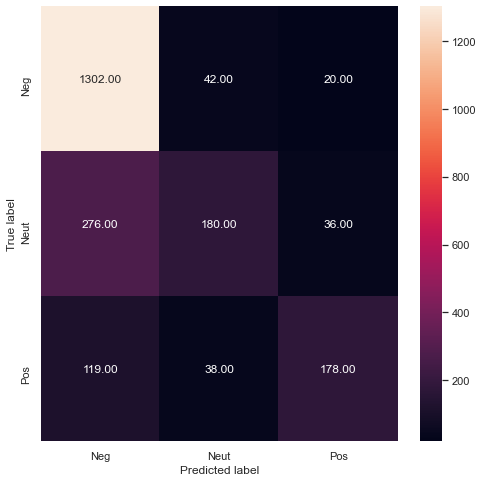

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1364
           1       0.69      0.37      0.48       492
           2       0.76      0.53      0.63       335

    accuracy                           0.76      2191
   macro avg       0.74      0.62      0.65      2191
weighted avg       0.75      0.76      0.73      2191

Testing(Holding) data Accuracy:  0.7631218621633957
Draw Confusion Matrix with Holdout Data


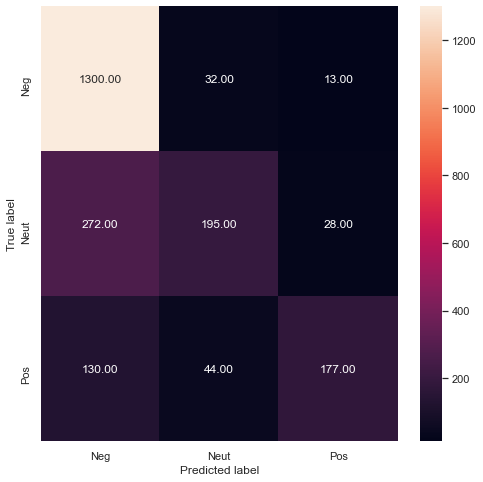

Classification Report for Validation Data
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1345
           1       0.72      0.39      0.51       495
           2       0.81      0.50      0.62       351

    accuracy                           0.76      2191
   macro avg       0.77      0.62      0.66      2191
weighted avg       0.76      0.76      0.74      2191



In [92]:
# Training and Validation Accuracy

print('Training Accuracy : ', tfidf_forest.score(Xt_train, y_train))
print('Validation Accuracy: ', tfidf_forest.score(Xt_valid, y_valid))

# cross validation
print('Training Accuracy by cross validation: ',np.mean(cross_val_score(tfidf_forest, Xt_train, y_train, cv=10)))

# predict with validation data
y_valid_predict = tfidf_forest.predict(Xt_valid)

print("Draw Confusion Matrix with Validation Data")
draw_confusion_matrix(y_valid, y_valid_predict)

# Classification Report
print('Classification Report for Validation Data')
print(classification_report(y_valid, y_valid_predict))

# Hold out data accuracy
print('Testing(Holding) data Accuracy: ', tfidf_forest.score(Xt_hold, y_hold))

# predict with holdout data
y_hold_predict = tfidf_forest.predict(Xt_hold)


print("Draw Confusion Matrix with Holdout Data")
draw_confusion_matrix(y_hold, y_hold_predict)

# Classification Report
print('Classification Report for Validation Data')
print(classification_report(y_hold, y_hold_predict))



In [93]:
tfidf_score=tfidf_forest.score(Xt_hold, y_hold)

In [98]:
tempRawResultsDf = pd.DataFrame({'method':['tf-idf Vectorizer'], 
                                 'model':'RandomForest Gini',
                              'test accuracy': round(tfidf_score,2)*100
                             }
                            )
rawResultsDF = pd.concat([rawResultsDF, tempRawResultsDf])
rawResultsDF = rawResultsDF[['method', 'model', 'test accuracy']]
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81
0,tf-idf Vectorizer,RandomForest Gini,76.00


## A quick check with AdaBoostClassifier for both methods.

#### AdaBoost with tfidfvectorizer

In [99]:
abc = AdaBoostClassifier(n_estimators = 20, random_state=65)
abc.fit(Xt_train, y_train)

AdaBoostClassifier(n_estimators=20, random_state=65)

Training score : 0.7094502054392486
Validation score: 0.6946599726152441
Hold out score: 0.6932907348242812
              precision    recall  f1-score   support

           0       0.69      0.95      0.80      1345
           1       0.63      0.06      0.12       495
           2       0.70      0.58      0.63       351

    accuracy                           0.69      2191
   macro avg       0.67      0.53      0.52      2191
weighted avg       0.68      0.69      0.62      2191



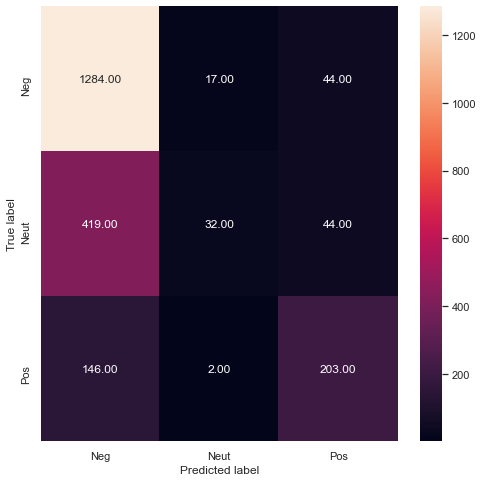

In [100]:
print("Training score :", abc.score(Xt_train, y_train))
print("Validation score:", abc.score(Xt_valid, y_valid))
print("Hold out score:", abc.score(Xt_hold, y_hold))

abc_tfidf_score=abc.score(Xt_hold, y_hold)

y_hold_predict = abc.predict(Xt_hold)

print(classification_report(y_hold,y_hold_predict))

draw_confusion_matrix(y_hold,y_hold_predict)

#### AdaBoost with tfidf countvectorizer

In [101]:
abc1 = AdaBoostClassifier(n_estimators = 20, random_state=65)
abc1.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20, random_state=65)

Training score : 0.6327528859323028
Validation score: 0.6188954815152898
Hold out score: 0.6111364673664993
              precision    recall  f1-score   support

           0       0.61      0.99      0.76      1345
           1       1.00      0.00      0.00       495
           2       0.09      0.00      0.01       351

    accuracy                           0.61      2191
   macro avg       0.57      0.33      0.26      2191
weighted avg       0.62      0.61      0.47      2191



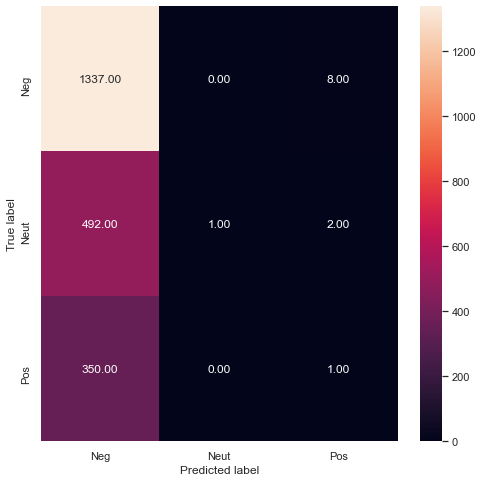

In [102]:
print("Training score :", abc1.score(X_train, y_train))
print("Validation score:", abc1.score(X_valid, y_valid))
print("Hold out score:", abc1.score(X_hold, y_hold))

abc1_cv_score=abc1.score(X_hold, y_hold)

y_hold_predict = abc1.predict(X_hold)

print(classification_report(y_hold,y_hold_predict))

draw_confusion_matrix(y_hold,y_hold_predict)

In [103]:
tempRawResultsDf = pd.DataFrame({'method':['count Vectorizer'], 
                                 'model':'AdaBoost',
                              'test accuracy': round(abc1_cv_score,2)*100
                             }
                            )
rawResultsDF = pd.concat([rawResultsDF, tempRawResultsDf])
rawResultsDF = rawResultsDF[['method', 'model', 'test accuracy']]
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81
0,tf-idf Vectorizer,RandomForest Gini,76.00
0,count Vectorizer,AdaBoost,61.00


In [105]:
tempRawResultsDf = pd.DataFrame({'method':['tf-idf Vectorizer'], 
                                 'model':'AdaBoost',
                              'test accuracy': round(abc_tfidf_score,2)*100
                             }
                            )
rawResultsDF = pd.concat([rawResultsDF, tempRawResultsDf])
rawResultsDF = rawResultsDF[['method', 'model', 'test accuracy']]
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81
0,tf-idf Vectorizer,RandomForest Gini,76.00
0,count Vectorizer,AdaBoost,61.00
0,tf-idf Vectorizer,AdaBoost,69.00


## Final check with Bagging Classifier for both the methods

#### Bagging with count vectorizer

In [107]:
bgc = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=65)
bgc.fit(X_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=50, oob_score=True,
                  random_state=65)

Training score : 0.9597926041870476
Validation score: 0.5883158375171155
Hold out score: 0.5860337745321771
              precision    recall  f1-score   support

           0       0.61      0.93      0.74      1345
           1       0.28      0.06      0.10       495
           2       0.09      0.01      0.02       351

    accuracy                           0.59      2191
   macro avg       0.33      0.33      0.29      2191
weighted avg       0.45      0.59      0.48      2191



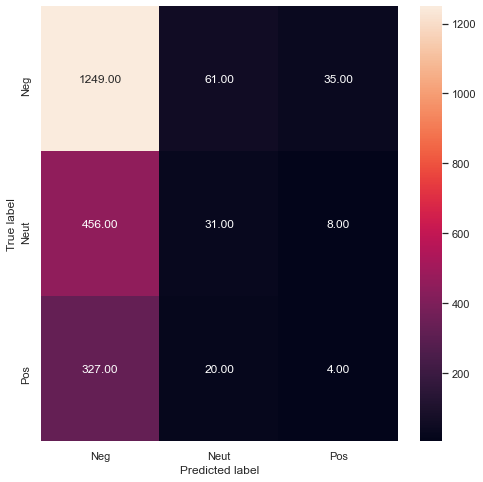

In [108]:
print("Training score :", bgc.score(X_train, y_train))
print("Validation score:", bgc.score(X_valid, y_valid))
print("Hold out score:", bgc.score(X_hold, y_hold))

bgc_cv_score=bgc.score(X_hold, y_hold)

y_hold_predict = bgc.predict(X_hold)

print(classification_report(y_hold,y_hold_predict))

draw_confusion_matrix(y_hold,y_hold_predict)

### Bagging with tfidf vectorizer

In [109]:
bgc = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=65)
bgc.fit(Xt_train, y_train)

BaggingClassifier(max_samples=0.7, n_estimators=50, oob_score=True,
                  random_state=65)

Training score : 0.9708471923302681
Validation score: 0.7412140575079872
Hold out score: 0.7448653582838887
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1345
           1       0.64      0.41      0.50       495
           2       0.70      0.55      0.62       351

    accuracy                           0.74      2191
   macro avg       0.70      0.63      0.65      2191
weighted avg       0.73      0.74      0.73      2191



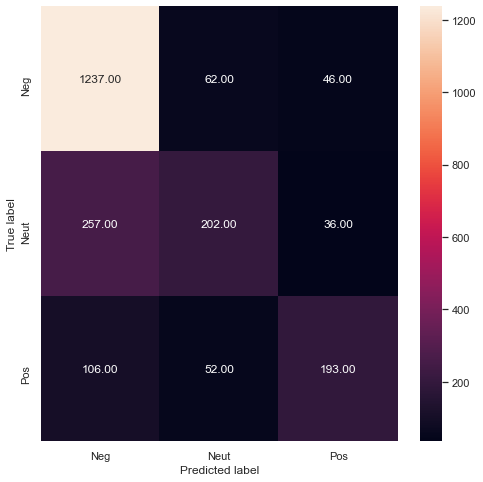

In [110]:
print("Training score :", bgc.score(Xt_train, y_train))
print("Validation score:", bgc.score(Xt_valid, y_valid))
print("Hold out score:", bgc.score(Xt_hold, y_hold))

bgc_tfidf_score=bgc.score(Xt_hold, y_hold)

y_hold_predict = bgc.predict(Xt_hold)

print(classification_report(y_hold,y_hold_predict))

draw_confusion_matrix(y_hold,y_hold_predict)

In [111]:
tempRawResultsDf = pd.DataFrame({'method':['count Vectorizer'], 
                                 'model':'Bagging',
                              'test accuracy': round(bgc_cv_score,2)*100
                             }
                            )
rawResultsDF = pd.concat([rawResultsDF, tempRawResultsDf])
rawResultsDF = rawResultsDF[['method', 'model', 'test accuracy']]
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81
0,tf-idf Vectorizer,RandomForest Gini,76.00
0,count Vectorizer,AdaBoost,61.00
0,tf-idf Vectorizer,AdaBoost,69.00
0,count Vectorizer,Bagging,59.00


In [112]:
tempRawResultsDf = pd.DataFrame({'method':['tfidf Vectorizer'], 
                                 'model':'Bagging',
                              'test accuracy': round(bgc_tfidf_score,2)*100
                             }
                            )
rawResultsDF = pd.concat([rawResultsDF, tempRawResultsDf])
rawResultsDF = rawResultsDF[['method', 'model', 'test accuracy']]
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81
0,tf-idf Vectorizer,RandomForest Gini,76.00
0,count Vectorizer,AdaBoost,61.00
0,tf-idf Vectorizer,AdaBoost,69.00
0,count Vectorizer,Bagging,59.00
0,tfidf Vectorizer,Bagging,74.00


#### From the above matrix we see that RandomForest seems to be a good model with ~77% accuracy. And the accuracy is almost same for both methods of bag of words - CountVectorizer and tf-idf vectorizer. 
#### I tried with couple of other classifiers Adaboost and Bagging, but the accuracy is lower than RandomForest. To note is tfidf vecotrizer if used to create the bag of words perfoms well within each of the algorithm. (For RandomForest, in our present case, its almost same).

## Step 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks) 

### Application of Various Pre-Processing
- The main intent of the pre-processing is to clean the data which primarily we filter from free-form text in the dataframe. The text will have lots of information which is not usefuel/irrelevant for model generation and prediction. Pre-processing is to ensure textual data which is unstructured is properly cleansed before sending to further processing for modelling

- Text contains lot of irreleant data (aka noise data) like punctuations, special characters, numbers when the business case doesn't need numbers to analysis, commonly used words (like prepositions ) that increase the time of execution. These words should be removed.

- The cleaning up process ois called text pre-processing.

- In our business case we used the following:

- 1. HTML tag removal: It removes all the text in a document within the html tag.
- 2. Contraction Replacement: Contractions are shortened version of words or syllables like don't. These need to be expanded/replaced to get the full words that ensures standardization.
- 3. Removal of numbers : In our present business case numbers are not required from text to get the sentiment, rather key words like not etc are required that denotes sentiments.
- 4. Remove Special Chars : Removing special characters that do not add value to the interpretation.
- 5. Tokenization: Is a method of taking a text and breaking into invididual tokens. This is an important step of preprocessing. Further processing is done after a piece of text is tokenized properly.
- 6. Remove Punctuation : Remove punctuation from the tokenized words. This does not add value for sentiment analysis in our business case.
- 7. To Lowercase : converting tokens into lower case ensures standardization.
- 8. Remove non-ascii chars : this will ensure any accented characters that do not add value for text analysis is removed.
- 9. Remove Stop-words : Stop-words are often commonly used words that do not add value for analysis. These need to be removed. But not always when there is some contextual reference required. In our case, I excluded a set of words like not, has not, etc. from stop words as these words are required for sentiment analysis.
- 10. Lemmatization: Lemmatization ensures that different forms of words are reduce to their core root. This ensures dimensionality reduction. Lemmatization ensures that the the resolved words (lemma) belongs to the language and is not a gibberish word.

### Vectorization
#### These are steps once pre-processing is complete. And vectorization ensures converting the processed text to a numeral form which machine learning algortihms can consume. There are couple of methods :

- A. COUNT VECTORIZATION:
     - Also known as Bag of Words is a feature extraction approach where unique words from a text are retreived
     - Each text is considered as a bag of its constituent words.
     - Tokeized words from preprocessing is used for bagging and each observationc count or frequency is taken and a matrix is created which is converted to an array for model processing
     - the vector thus created will be a sparse matrix/array as the count of word is stored at its particular location in the array.

- B. TF-IDF VECTORIZATION:
     - TF-IDF is acronym for Term Frequency - Invesrse Document Frequncey
     - This is a method that gives less importance to more frequent words and increase weightage to less frequent words.
     - Term Frequency means the frequency of a particular word in a given text(document) divided by total words in that text (document)
     - Inverse Document Frequncy takes the inverse of the number of documents a word is present in the corpus set and the total number of documents. The inverse is then taken to the logarithmic based 2. 
     - The above method ensures a word that appears in majority of the documents the value is 0 and hence the total weightage is 0 (tf*idf).


### Performance of the Models used:
#### From the table presented below we see that RandomForest seems to be a good model with ~77% accuracy. And the accuracy is almost same for both methods of bag of words - CountVectorizer and tf-idf vectorizer. 
#### In addition, I tried with couple of other classifiers Adaboost and Bagging, but the accuracy is lower than RandomForest. To note is tfidf vecotrizer if used to create the bag of words perfoms well within each of the algorithm. (For RandomForest, in our present case, its almost same).

In [118]:
rawResultsDF

,method,model,test accuracy
0,CountVectorizer,RandomForest Gini,76.81
0,tf-idf Vectorizer,RandomForest Gini,76.00
0,count Vectorizer,AdaBoost,61.00
0,tf-idf Vectorizer,AdaBoost,69.00
0,count Vectorizer,Bagging,59.00
0,tfidf Vectorizer,Bagging,74.00
